In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# mean std stderr var n min max median range sum css uss cv skewness kurtosis;
fruit = pd.read_csv('fruit.csv')
fruit_mean = fruit['yield'].mean()
fruit_std = fruit['yield'].std()
fruit_stderr = np.divide(fruit['yield'].std(),np.sqrt(len(fruit['yield'])))
fruit_var = fruit['yield'].var()
fruit_n = len(fruit['yield'])
fruit_min = min(fruit['yield'])
fruit_max = max(fruit['yield'])
fruit_median = fruit['yield'].median()
fruit_range = fruit_max-fruit_min
fruit_sum = fruit['yield'].sum()
fruit_css = sum(np.square(fruit['yield']-fruit_mean))
fruit_uss = sum(np.square(fruit['yield']))
fruit_cv = np.divide(fruit_std,fruit_mean)*100
fruit_skewness = fruit['yield'].skew()
fruit_kurtosis = fruit['yield'].kurt()

In [3]:
fruit_li = [[fruit_mean],[fruit_std],[fruit_stderr],[fruit_var],[fruit_n],
            [fruit_min],[fruit_max],[fruit_median],[fruit_range],[fruit_sum],
            [fruit_css],[fruit_uss],[fruit_cv],[fruit_skewness],[fruit_kurtosis]]
fruit_array = round(pd.DataFrame(fruit_li,columns=['Num']),4)
fruit_array.index = pd.Index(['mean','std','stderr','var','n','min','max','median',
                              'range','sum','css','uss','cv','skewness','kurtosis'])
fruit_array

,Num
mean,74.6900
std,22.2841
stderr,2.2284
var,496.5797
n,100.0000
min,26.0000
max,133.0000
median,75.0000
range,107.0000
sum,7469.0000


In [4]:
# 正太分布检验
# S-W小样本检验
W,p_value = np.round(stats.shapiro(fruit['yield']),4)
fruit_w ={'样本均值':fruit_mean,'W统计量':W,'p值':p_value}
pd.DataFrame(fruit_w,index=['Num'])

,样本均值,W统计量,p值
Num,74.69,0.9876,0.4816


In [5]:
# K-S大样本检验
D,p_value = np.round(stats.kstest(fruit['yield'],'norm',alternative='two-sided',mode='asymp'
                                  ,args=(fruit_mean,fruit_std)),4)
fruit_d ={'样本均值':fruit_mean,'D统计量':D,'p值':p_value}
pd.DataFrame(fruit_d,index=['Num'])
# fruit为大样本，D=0.0718，p=0.681(p>0.05),故不拒绝原假设，没有证据显示fruit不服从正态分布。

,样本均值,D统计量,p值
Num,74.69,0.0718,0.681


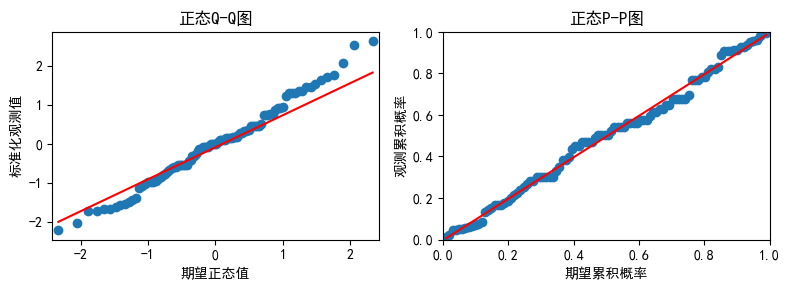

In [6]:
pplot = sm.ProbPlot(fruit['yield'],fit=True)
plt.subplots(1,2,figsize=(8,3))
# QQ图
ax1 = plt.subplot(121)
pplot.qqplot(line='q',ax=ax1,xlabel='期望正态值',ylabel='标准化观测值')
ax1.set_title('正态Q-Q图',fontsize=12)
# PP图
ax2 = plt.subplot(122)
pplot.ppplot(line='r',ax=ax2,xlabel='期望累积概率',ylabel='观测累积概率')
ax2.set_title('正态P-P图',fontsize=12)
plt.tight_layout()
plt.show()